<a href="https://colab.research.google.com/github/OilNarumon031925/backend_cyber_thesis/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Bully_Model_classification_StratifiedKFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

     | 24.8 MB 4.0 MB/s 0:00:04
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pythainlp: filename=pythainlp-5.2.0-py3-none-any.whl size=19271132 sha256=302a509def013254dcbbb5d450092a947ade077984907f77d8e74e06d2a9fee4
  Stored in directory: /tmp/pip-ephem-wheel-cache-uovw0vz2/wheels/25/0b/4c/6985a88c426187c7e836af7206d9469374ac2e041453c250e7
Successfully built pythainlp


# Prepraring data

In [ ]:
import pandas as pd

dataset_path = "/content/ข้อมูลแยกประเภทข้อความการกลั่นแกล้งทางไซเบอร์.xlsx"

dataset = pd.read_excel(dataset_path)
dataset.sample(5)

,tweet,clean_tweet,Text,Class
3054,NaN,NaN,NaN,NaN
516,ทำไมเกิดมาไม่สวยเหมือนคนอื่นเขา,ทำไมเกิดมาไม่สวยเหมือนคนอื่นเขา,ทำไมเกิดมาไม่สวยเหมือนคนอื่นเขา,bully
1074,อีควายนี่โง่มาก เขากดให้แบนก็ไม่แบน เล่นก็โง่เ...,อีควายนี่โง่มาก เขากดให้แบนก็ไม่แบน เล่นก็โง่เ...,อีควายนี่โง่มากเขากดให้แบนก็ไม่แบนเล่นก็โง่เสื...,bully
1194,@youbemyfavsong วดว.ขายโง่none,@ วดว.ขายโง่,วดวขายโง่,bully
4257,"ใครอยากเห็นหน้าเหี้ยยนี่ ส่งรูปให้""",เตือนผู้หญิง ผู้ชายหว่านล้อมพูดดี ให้โอนเงิน,NaN,NaN


In [ ]:
dataset = dataset[['Text', 'Class']]
dataset.head()

,Text,Class
0,หลังจากนี้ไม่จัดเทียร์แล้วนะเป็นร้านที่กินบ่อย...,none
1,รีวิวเลยแล้วกันขอจัดเทียร์ร้านข้าวหมูแดงที่คนน...,none
2,ข้าวหมูแดงร้านนายฉั่วตรงตลาดล่างตรงข้ามองค์พระ...,none
3,อยู่ตรงตลาดล่างมอจริงๆด้วย,none
4,อยู่ตลาดล่างตรงองค์พระเลยค่าเข้าไปในตลาดเลย,none


<Axes: xlabel='Class'>

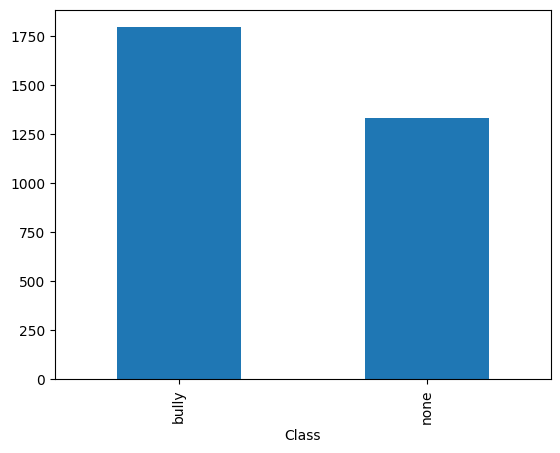

In [ ]:
dataset.Class.value_counts().plot(kind='bar')

In [ ]:
dataset.Class.value_counts()

,count
Class,
bully,1796
none,1332


In [ ]:
from pythainlp.corpus import thai_stopwords
stopwords = thai_stopwords()

# bully 1 (Negative)
# none 0 (Positive)

def convert_labeled(txt):
  if txt == "bully":
    return 1
  return 0

import re
import string

def remove_punctuation(txt):
  return re.sub('[^ก-๙]','',str(txt))

def remove_stopword(tokenize):
  stop_words = [w for w in  tokenize if w not in stopwords]
  return stop_words

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install pythainlp

In [ ]:
from pythainlp.tokenize import word_tokenize

dataset['tags_num'] = dataset.Class.apply(convert_labeled)
dataset['text_clean'] = dataset.Text.apply(remove_punctuation)
dataset['text_clean'] = dataset['text_clean'].apply(word_tokenize)
# dataset['text_clean'] = dataset['text_clean'].apply(remove_stopword)
dataset['text_clean'] = [" ".join(map(str, w)) for w in dataset.text_clean]

dataset

,Text,Class,tags_num,text_clean
0,หลังจากนี้ไม่จัดเทียร์แล้วนะเป็นร้านที่กินบ่อย...,none,0,หลังจากนี้ ไม่ จัด เทียร์ แล้ว นะ เป็น ร้าน ที...
1,รีวิวเลยแล้วกันขอจัดเทียร์ร้านข้าวหมูแดงที่คนน...,none,0,รีวิว เลย แล้วกัน ขอ จัด เทียร์ ร้าน ข้าวหมูแด...
2,ข้าวหมูแดงร้านนายฉั่วตรงตลาดล่างตรงข้ามองค์พระ...,none,0,ข้าวหมูแดง ร้าน นาย ฉั่ว ตรง ตลาด ล่าง ตรงข้าม...
3,อยู่ตรงตลาดล่างมอจริงๆด้วย,none,0,อยู่ ตรง ตลาด ล่าง มอ จริงๆ ด้วย
4,อยู่ตลาดล่างตรงองค์พระเลยค่าเข้าไปในตลาดเลย,none,0,อยู่ ตลาด ล่าง ตรง องค์ พระ เลย ค่า เข้าไป ใน ...
...,...,...,...,...
5376,ดอกไม้ดอกใหญ่,none,0,ดอก ไม้ดอก ใหญ่
5377,ดอกกุุหลาบสีแดง,none,0,ดอก กุ ุ หลาบ สีแดง
5378,ดอกไม้,none,0,ดอกไม้
5379,แรดตัวน้อย,none,0,แรด ตัว น้อย


In [ ]:
def identity_text(text):
    return text

def text_tokenizer(text: str) -> list[str]:
  from pythainlp.tokenize import word_tokenize
  from pythainlp.util import isthai
  return [term for term in word_tokenize(text) if isthai(term)]

In [ ]:
from pythainlp import corpus
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(tokenizer=text_tokenizer)
tfidf_vector = tfidf_vectorizer.fit_transform(dataset['text_clean'])
tfidf_array = np.array(tfidf_vector.todense())
dataset_tfidf = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names_out())
dataset_tfidf.head()

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,ก,กก,กค,กง,กช,กฎ,กฎหมาย,กฏ,กด,กดดัน,...,่ดออ,้,ํา,ําเนิด,๒๕๕๙,๔,๕,๕๕๕๕๕๕๕,๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕๕,๖๒๑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# display feature name
tfidf_vectorizer.get_feature_names_out()[3000:3500]

array(['มดดำ', 'มดี', 'มติ', 'มน', 'มนต์', 'มนุษย์', 'มฟล', 'มม', 'มมม',
       'มมาก', 'มรดก', 'มรึง', 'มล', 'มลภาวะ', 'มล้า', 'มล้าง', 'มวล',
       'มศว', 'มหา', 'มหาดไทย', 'มหาลัย', 'มหิ', 'มอ', 'มอง', 'มองดู',
       'มองตาม', 'มองว่า', 'มองหน้า', 'มองเห็น', 'มอบ', 'มอบให้', 'มอม',
       'มอมแมม', 'มอยส์', 'มอยส์เจอไรเซอร์', 'มอเตอร์ไซค์', 'มะ', 'มะนาว',
       'มะพร้าว', 'มะม่วง', 'มะละกอ', 'มะเขือ', 'มะเขือเทศ', 'มะเร็ง',
       'มัก', 'มักง่าย', 'มักจะ', 'มัด', 'มัดจำ', 'มัน', 'มันดี',
       'มันฝรั่งทอด', 'มันวาว', 'มันส์', 'มันเขี้ยว', 'มันเทศ', 'มัม',
       'มัวหมอง', 'มัสก์', 'มั่กปล', 'มั่ง', 'มั่น', 'มั่นใจ',
       'มั่นใจตัวเอง', 'มั่ย', 'มั่ยห', 'มั่ว', 'มั่วซั่ว', 'มั้ง',
       'มั้ย', 'มั๊ย', 'มา', 'มาก', 'มากกว่า', 'มากขึ้น', 'มากความ',
       'มากมาย', 'มาจาก', 'มาตรฐาน', 'มาตรฐานสากล', 'มาตา', 'มาตามหา',
       'มาตี', 'มาถึง', 'มาทัน', 'มาน', 'มานะ', 'มาม่า', 'มาย', 'มายด์',
       'มายัง', 'มายัน', 'มาร', 'มารยาท', 'มาริ', 'มาร์ค', 'มาสคาร่า',
       'มาส์',

In [ ]:
X = dataset_tfidf
y = dataset[('tags_num')]

In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

clf = svm.SVC()
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

results = []

for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _= precision_recall_fscore_support(y_test, y_pred, average='weighted')

    results.append({
        'Fold': f'Fold {i}',
        'Accuracy': accuracy * 100, # ทำเป็นเปอร์เซ็นต์ตามภาพตัวอย่าง
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1_score
    })
    print(f'Fold {i} finished...')

df_results = pd.DataFrame(results)

# คำนวณค่าเฉลี่ย (Average)
average_row = df_results.mean(numeric_only=True).to_dict()
average_row['Fold'] = 'Average'
df_results = pd.concat([df_results, pd.DataFrame([average_row])], ignore_index=True)

# แสดงผลตาราง
print("\nSummary Report:")
print(df_results.to_string(index=False))

Fold 1 finished...
Fold 2 finished...
Fold 3 finished...
Fold 4 finished...
Fold 5 finished...
Fold 6 finished...
Fold 7 finished...
Fold 8 finished...
Fold 9 finished...
Fold 10 finished...

Summary Report:
   Fold  Accuracy  Precision   Recall  F1 score
 Fold 1 91.280148   0.913939 0.912801  0.913204
 Fold 2 86.617100   0.881454 0.866171  0.868948
 Fold 3 89.962825   0.909749 0.899628  0.901405
 Fold 4 91.263941   0.921935 0.912639  0.914149
 Fold 5 92.379182   0.926212 0.923792  0.924424
 Fold 6 91.449814   0.919921 0.914498  0.915605
 Fold 7 90.520446   0.913719 0.905204  0.906737
 Fold 8 91.078067   0.916284 0.910781  0.911936
 Fold 9 91.449814   0.921488 0.914498  0.915767
Fold 10 86.988848   0.889810 0.869888  0.872867
Average 90.299019   0.911451 0.902990  0.904504


In [ ]:
import numpy as np
from scipy import stats

# --- ส่วนที่เพิ่มต่อจากเดิม ---

# 1. คำนวณค่า SD (Standard Deviation)
sd_row = df_results.iloc[:-1].std(numeric_only=True).to_dict() # ไม่เอาแถว Average มาคำนวณ
sd_row['Fold'] = 'SD'

# 2. คำนวณค่า 95% Confidence Interval (CI)
# สูตร: t * (sd / sqrt(n))
n = 10 # จำนวน Fold
confidence = 0.95
t_crit = stats.t.ppf((1 + confidence) / 2, n - 1) # t-value สำหรับ n=10

ci_values = {}
for col in df_results.columns:
    if col != 'Fold':
        # คำนวณ CI ของแต่ละ Column
        std_val = df_results.iloc[:-1][col].std()
        ci_values[col] = t_crit * (std_val / np.sqrt(n))

ci_values['Fold'] = '95% CI (+/-)'

# 3. รวมค่า SD และ CI เข้าไปใน DataFrame หลัก
df_results = pd.concat([df_results, pd.DataFrame([sd_row, ci_values])], ignore_index=True)

# แสดงผลตารางใหม่ที่มีทั้ง Average, SD และ CI
print("\nFinal Summary Report with Statistics:")
print(df_results.round(4).to_string(index=False)) # ปัดเศษ 4 ตำแหน่งให้อ่านง่าย


Final Summary Report with Statistics:
        Fold  Accuracy  Precision  Recall  F1 score
      Fold 1   91.2801     0.9139  0.9128    0.9132
      Fold 2   86.6171     0.8815  0.8662    0.8689
      Fold 3   89.9628     0.9097  0.8996    0.9014
      Fold 4   91.2639     0.9219  0.9126    0.9141
      Fold 5   92.3792     0.9262  0.9238    0.9244
      Fold 6   91.4498     0.9199  0.9145    0.9156
      Fold 7   90.5204     0.9137  0.9052    0.9067
      Fold 8   91.0781     0.9163  0.9108    0.9119
      Fold 9   91.4498     0.9215  0.9145    0.9158
     Fold 10   86.9888     0.8898  0.8699    0.8729
     Average   90.2990     0.9115  0.9030    0.9045
          SD    1.9480     0.0146  0.0195    0.0187
95% CI (+/-)    1.3935     0.0104  0.0139    0.0134


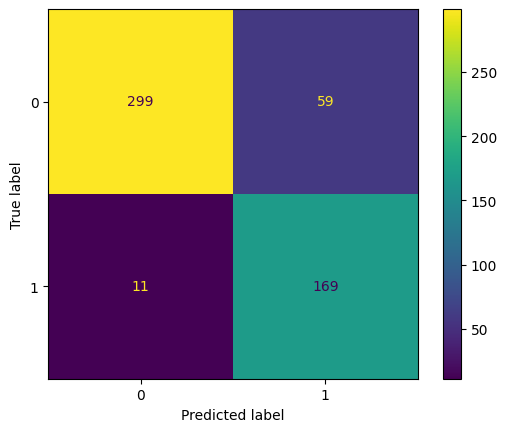

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

#model LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# ตั้งค่าโมเดลและ K-Fold
LSTR = LogisticRegression(random_state=0)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# สร้างลิสต์เพื่อเก็บผลลัพธ์ในแต่ละรอบ
results = []

for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    LSTR.fit(X_train, y_train)
    y_pred = LSTR.fit(X_train, y_train).predict(X_test)

    # คำนวณ Metrics (ใช้ macro average เพื่อให้ได้ค่าเดียวต่อรอบ)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

    # เก็บข้อมูลลงในลิสต์
    results.append({
        'K-fold': f'Fold {i}',
        'Accuracy': acc * 100, # ทำเป็นเปอร์เซ็นต์ตามภาพที่ 1
        'Precision': prec,
        'Recall': rec,
        'F1 score': f1
    })

# สร้าง DataFrame เพื่อแสดงผล
df_results = pd.DataFrame(results)

# คำนวณค่าเฉลี่ย
average_row = df_results.mean(numeric_only=True).to_dict()
average_row['K-fold'] = 'Average'
df_results = pd.concat([df_results, pd.DataFrame([average_row])], ignore_index=True)

# แสดงผลลัพธ์
print(df_results.to_string(index=False))

 K-fold  Accuracy  Precision   Recall  F1 score
 Fold 1 85.343228   0.854957 0.808256  0.824767
 Fold 2 82.899628   0.814605 0.790635  0.800281
 Fold 3 86.431227   0.852762 0.836705  0.843791
 Fold 4 87.360595   0.874837 0.835266  0.850372
 Fold 5 89.033457   0.888643 0.860405  0.872129
 Fold 6 86.059480   0.861060 0.819289  0.834682
 Fold 7 87.918216   0.872869 0.851210  0.860474
 Fold 8 84.200743   0.833641 0.802561  0.814554
 Fold 9 87.546468   0.873602 0.841511  0.854312
Fold 10 84.572491   0.829143 0.820546  0.824525
Average 86.136553   0.855612 0.826638  0.837989


In [ ]:
import numpy as np
from scipy import stats

# --- ส่วนนี้เพิ่มต่อจากตอนสร้าง df_results ในภาพของคุณ ---

# 1. คำนวณค่าทางสถิติ (Accuracy, Precision, Recall, F1 score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']

# คำนวณ Average (มีอยู่แล้วในโค้ดเดิมของคุณ)
avg_values = df_results[metrics].mean()

# คำนวณ Standard Deviation (SD)
sd_values = df_results[metrics].std()

# คำนวณ 95% Confidence Interval (CI)
# สูตร: Confidence Interval = 1.96 * (SD / sqrt(n))
n = 10 # จำนวน folds
ci_values = 1.96 * (sd_values / np.sqrt(n))

# 2. สร้างตารางสรุปใหม่ให้ดูง่ายขึ้น
summary_df = pd.DataFrame({
    'Average': avg_values,
    'SD': sd_values,
    '95% CI (+/-)': ci_values
}).T.reset_index().rename(columns={'index': 'Stat'})

# 3. แสดงผล
print("\n--- Detailed Statistics ---")
print(summary_df.to_string(index=False))

# หรือถ้าอยากต่อท้ายตารางเดิมแบบในภาพ:
sd_row = sd_values.to_dict()
sd_row['K-fold'] = 'SD'

ci_row = ci_values.to_dict()
ci_row['K-fold'] = '95% CI'

df_final = pd.concat([df_results, pd.DataFrame([sd_row, ci_row])], ignore_index=True)
print("\n--- Final Table with SD and CI ---")
print(df_final.to_string(index=False))


--- Detailed Statistics ---
        Stat  Accuracy  Precision   Recall  F1 score
     Average 86.136553   0.855612 0.826638  0.837989
          SD  1.801277   0.022328 0.021085  0.021125
95% CI (+/-)  1.116443   0.013839 0.013069  0.013093

--- Final Table with SD and CI ---
 K-fold  Accuracy  Precision   Recall  F1 score
 Fold 1 85.343228   0.854957 0.808256  0.824767
 Fold 2 82.899628   0.814605 0.790635  0.800281
 Fold 3 86.431227   0.852762 0.836705  0.843791
 Fold 4 87.360595   0.874837 0.835266  0.850372
 Fold 5 89.033457   0.888643 0.860405  0.872129
 Fold 6 86.059480   0.861060 0.819289  0.834682
 Fold 7 87.918216   0.872869 0.851210  0.860474
 Fold 8 84.200743   0.833641 0.802561  0.814554
 Fold 9 87.546468   0.873602 0.841511  0.854312
Fold 10 84.572491   0.829143 0.820546  0.824525
Average 86.136553   0.855612 0.826638  0.837989
     SD  1.801277   0.022328 0.021085  0.021125
 95% CI  1.116443   0.013839 0.013069  0.013093


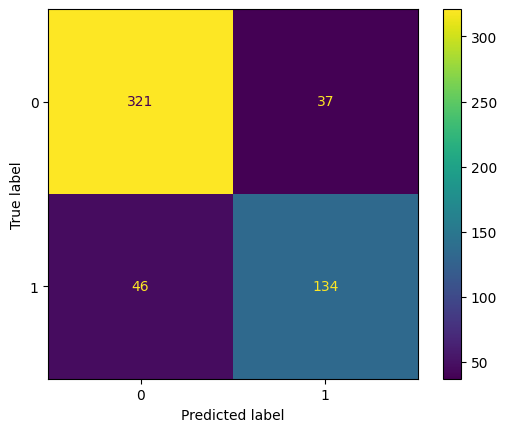

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

Model  GaussianNB

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats # สำหรับคำนวณ CI
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- (ส่วนเตรียมโมเดลและ Loop เหมือนเดิม) ---
gnb = GaussianNB()
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
results = []

fold_num = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    results.append({
        'Fold': f'Fold {fold_num}',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 score': f1_score(y_test, y_pred, average='macro')
    })
    fold_num += 1

# แปลงเป็น DataFrame
df_results = pd.DataFrame(results)

# --- ส่วนที่เพิ่มใหม่: คำนวณ SD และ CI ---

# 1. คำนวณค่าเฉลี่ย (Mean)
avg_values = df_results.mean(numeric_only=True)

# 2. คำนวณค่าเบี่ยงเบนมาตรฐาน (SD)
sd_values = df_results.std(numeric_only=True)

# 3. คำนวณ 95% Confidence Interval (CI)
# สูตร: Mean +/- (t * (SD / sqrt(n)))
n = 10  # จำนวน folds
confidence = 0.95
t_crit = stats.t.ppf((1 + confidence) / 2, n - 1)
ci_values = t_crit * (sd_values / np.sqrt(n))

# --- จัดเตรียมแถวสรุปผลผลลัพธ์ ---

# แถว Average
avg_row = avg_values.to_dict()
avg_row['Fold'] = 'Average'

# แถว SD
sd_row = sd_values.to_dict()
sd_row['Fold'] = 'SD'

# แถว CI (95%)
ci_row = ci_values.to_dict()
ci_row['Fold'] = 'CI (95%)'

# รวมแถวทั้งหมดเข้ากับตารางหลัก
summary_df = pd.DataFrame([avg_row, sd_row, ci_row])
df_final = pd.concat([df_results, summary_df], ignore_index=True)

# แสดงผลลัพธ์
print(df_final.to_string(index=False))

    Fold  Accuracy  Precision   Recall  F1 score
  Fold 1  0.827458   0.811792 0.791527  0.799909
  Fold 2  0.797398   0.774719 0.758555  0.765285
  Fold 3  0.802974   0.790942 0.748728  0.762542
  Fold 4  0.819703   0.808605 0.772467  0.785436
  Fold 5  0.814126   0.799955 0.768289  0.779959
  Fold 6  0.825279   0.819401 0.776179  0.790956
  Fold 7  0.793680   0.774512 0.746912  0.757010
  Fold 8  0.804833   0.799994 0.745624  0.761649
  Fold 9  0.821561   0.808814 0.778911  0.790202
 Fold 10  0.801115   0.786483 0.751117  0.763316
 Average  0.810813   0.797522 0.763831  0.775626
      SD  0.012277   0.015489 0.015905  0.015361
CI (95%)  0.008783   0.011080 0.011378  0.010989


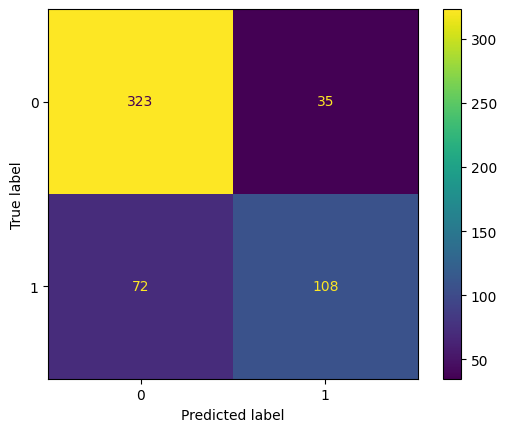

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()